# Working with Air Temperature Dataset

In [1]:
#importing the libraries to be used

############################################
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import cartopy
import cartopy.crs as ccrs
from cartopy import feature as cf
import seaborn as sns
import calendar
import warnings
############################################

# from mpl_toolkits.basemap import Basemap
#from metpy.cbook import get_test_data
# from matplotlib import cm
# import matplotlib.ticker as mticker


In [2]:
######################################
#loading the dataset5
era5_A = xr.open_dataset('era5_t2m.nc')
era5_A

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 408)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 1990-01-01 1990-02-01 ... 2023-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-03-03 18:58:47 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:

#converting kelvin to celcius degrees
era5_A = era5_A -273.15

## Descriptive Statistics

### Global

In [4]:
# Access the NumPy array of the data
t2m_data = era5_A['t2m'].sel(time=slice('1991', '2023')).values

# Compute the mean
t2m_mean = np.mean(t2m_data)

# Compute the standard deviation
t2m_std = np.std(t2m_data)

# Compute the median
t2m_median = np.median(t2m_data)

# Compute the minimum
t2m_min = np.min(t2m_data)

# Compute the maximum
t2m_max = np.max(t2m_data)

# Compute the 25 percentile
t2m_25 = np.percentile(t2m_data, 25)


# Compute the 25 percentile
t2m_50 = np.percentile(t2m_data, 50)

# Compute the 25 percentile
t2m_75 = np.percentile(t2m_data, 75)


# Print or use the results
print("Mean:", t2m_mean)
print("Standard Deviation:", t2m_std)
print("Median:", t2m_median)
print("Minimum:", t2m_min)
print("Maximum:", t2m_max)
print("25th Percentile:", t2m_25)
print("50th Percentile:", t2m_50)
print("75th Percentile:", t2m_75)

Mean: 5.4762883
Standard Deviation: 20.97479
Median: 10.459198
Minimum: -72.37303
Maximum: 42.3284
25th Percentile: -4.9713134765625
50th Percentile: 10.459197998046875
75th Percentile: 23.351806640625


### West Africa

In [5]:

# Define the region of West Africa
west_africa_t2m = era5_A['t2m'].sel(
    longitude=slice(-20, 16),
    latitude=slice(18, -1),
    time=slice('1991', '2023')
).values

# Compute the mean
west_t2m_mean = np.mean(west_africa_t2m)

# Compute the standard deviation
west_t2m_std = np.std(west_africa_t2m)

# Compute the maximum
west_t2m_max = np.max(west_africa_t2m)

# Compute the minimum
west_t2m_min = np.min(west_africa_t2m)

# Compute the median
west_t2m_median = np.median(west_africa_t2m)

# Compute the 25th percentile
west_t2m_25 = np.percentile(west_africa_t2m, 25)

# Compute the 50th percentile (same as the median)
west_t2m_50 = np.percentile(west_africa_t2m, 50)

# Compute the 75th percentile
west_t2m_75 = np.percentile(west_africa_t2m, 75)

# Print or use the results
print("Mean:", west_t2m_mean)
print("Standard Deviation:", west_t2m_std)
print("Median:", west_t2m_median)
print("Maximum:", west_t2m_max)
print("Minimum:", west_t2m_min)
print("25th Percentile:", west_t2m_25)
print("50th Percentile:", west_t2m_50)
print("75th Percentile:", west_t2m_75)


Mean: 26.838017
Standard Deviation: 3.4542923
Median: 26.472565
Maximum: 38.04721
Minimum: 12.149994
25th Percentile: 24.71002197265625
50th Percentile: 26.472564697265625
75th Percentile: 28.648162841796875


## Heatmaps

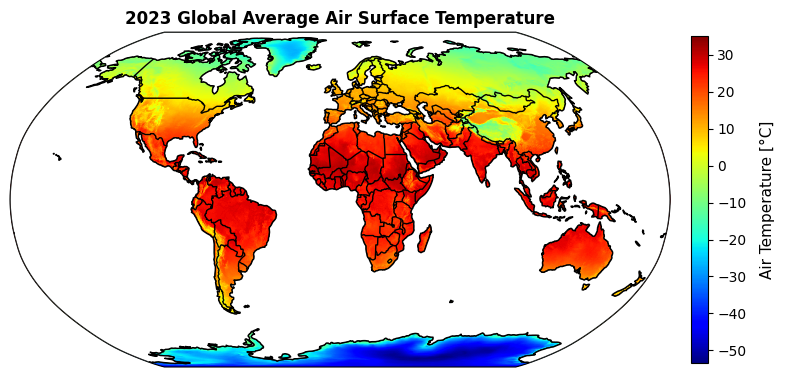

In [4]:

# Extract t2m data for the year 2023
t2m_2023 = era5_A['t2m'].sel(time='2023')

# Calculate the average t2m for the year 2023
t2m_2023_avg = t2m_2023.mean(dim='time')

# Define a function to plot global data on a map
def Global_plot(ERA5_dataset, title):
    # Create a figure and axis with specific projection
    fig, ax = plt.subplots(figsize=(9, 4.5), 
                           subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0)))

    # Plot the data on the map
    im = ax.pcolormesh(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       cmap='jet', 
                       shading='auto')

    # Add features to the map
    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor='white')

    # Set the title of the map with specified font weight
    ax.set_title(title, fontweight='bold')

    # Adding colorbar
    cb = plt.colorbar(im, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Air Temperature [°C]', fontsize=11, rotation=90, labelpad=10)

    # Display the plot
    plt.show()

# Call the function with the t2m data for 2023 and a custom title
Global_plot(t2m_2023_avg, '2023 Global Average Air Surface Temperature')


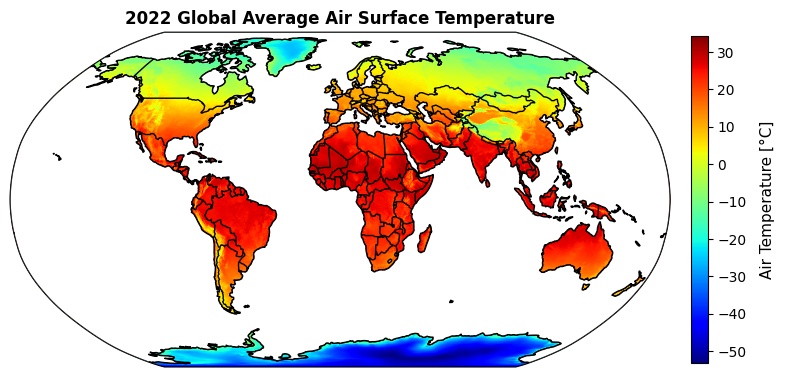

In [5]:
# Extract t2m data for the year 2022
t2m_2022 = era5_A['t2m'].sel(time='2022')

# Calculate the average t2m for the year 2022
t2m_2022_avg = t2m_2022.mean(dim='time')

# Define a function to plot global data on a map
def Global_plot(ERA5_dataset, title):
    # Create a figure and axis with specific projection
    fig, ax = plt.subplots(figsize=(9, 4.5), 
                           subplot_kw=dict(projection=ccrs.Robinson(central_longitude=0)))

    # Plot the data on the map
    im = ax.pcolormesh(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       cmap='jet', 
                       shading='auto')

    # Add features to the map
    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor='white')

    # Set the title of the map with specified font weight
    ax.set_title(title, fontweight='bold')

    # Adding colorbar
    cb = plt.colorbar(im, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Air Temperature [°C]', fontsize=11, rotation=90, labelpad=10)

    # Display the plot
    plt.show()

# Call the function with the t2m data for 2022 and a custom title
Global_plot(t2m_2022_avg, '2022 Global Average Air Surface Temperature')


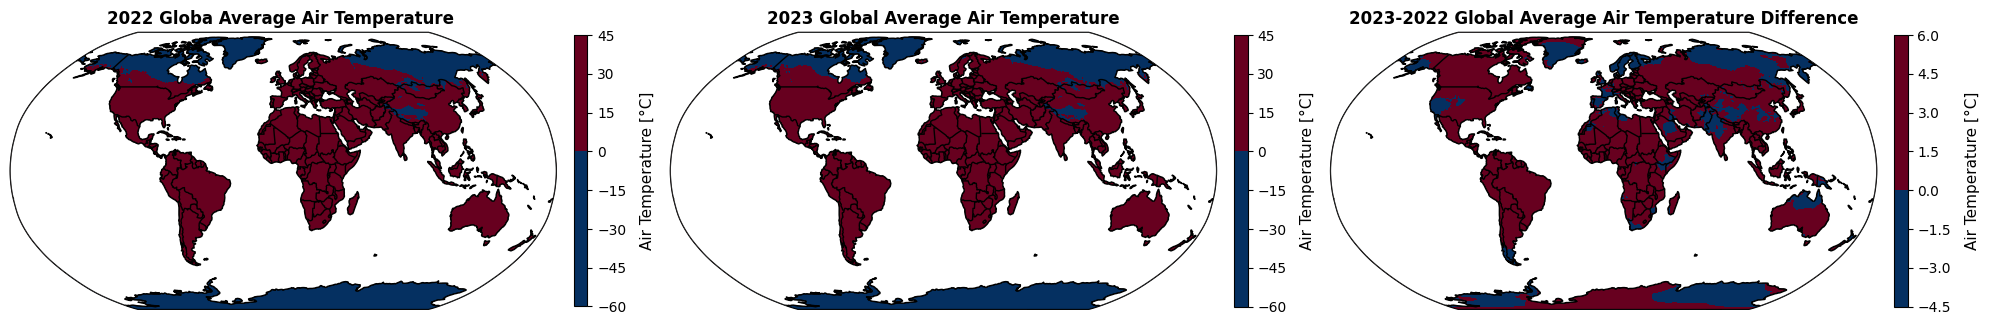

In [6]:
# Extract drought data for the year 2023
t2m_2022 = era5_A['t2m'].sel(time='2022')

t2m_2023 = era5_A['t2m'].sel(time='2023')

# # Calculate the average t2m for the year 2023
t2m_2022_avg = t2m_2022.mean(dim='time')

t2m_2023_avg = t2m_2023.mean(dim='time')

# Calculate difference
t2m_diff = t2m_2023_avg - t2m_2022_avg


# Function to create a plot
def global_plot(ax, data, title):
    cs = ax.contourf(data.longitude, 
                     data.latitude, 
                     data,
                     transform=ccrs.PlateCarree(), 
                     vmin=-0.03,
                     vmax=0.03,
                     cmap='RdBu_r')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor='white')

#     ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())
    ax.set_title(title, fontweight='bold')

    cb = plt.colorbar(cs, ax=ax, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Air Temperature [°C]', fontsize=11, rotation=90, labelpad=10)

# Create a 1 by 3 grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6), subplot_kw={'projection': ccrs.Robinson()})

# Plot for 2022
global_plot(axs[0], t2m_2022_avg, '2022 Globa Average Air Temperature ')

# Plot for 2023
global_plot(axs[1], t2m_2023_avg, '2023 Global Average Air Temperature')

# Plot for difference between 2023 and 2022
global_plot(axs[2], t2m_diff, '2023-2022 Global Average Air Temperature Difference')

plt.tight_layout()
plt.show()


### Monthly 2023 Global Air Temperature Anomaly

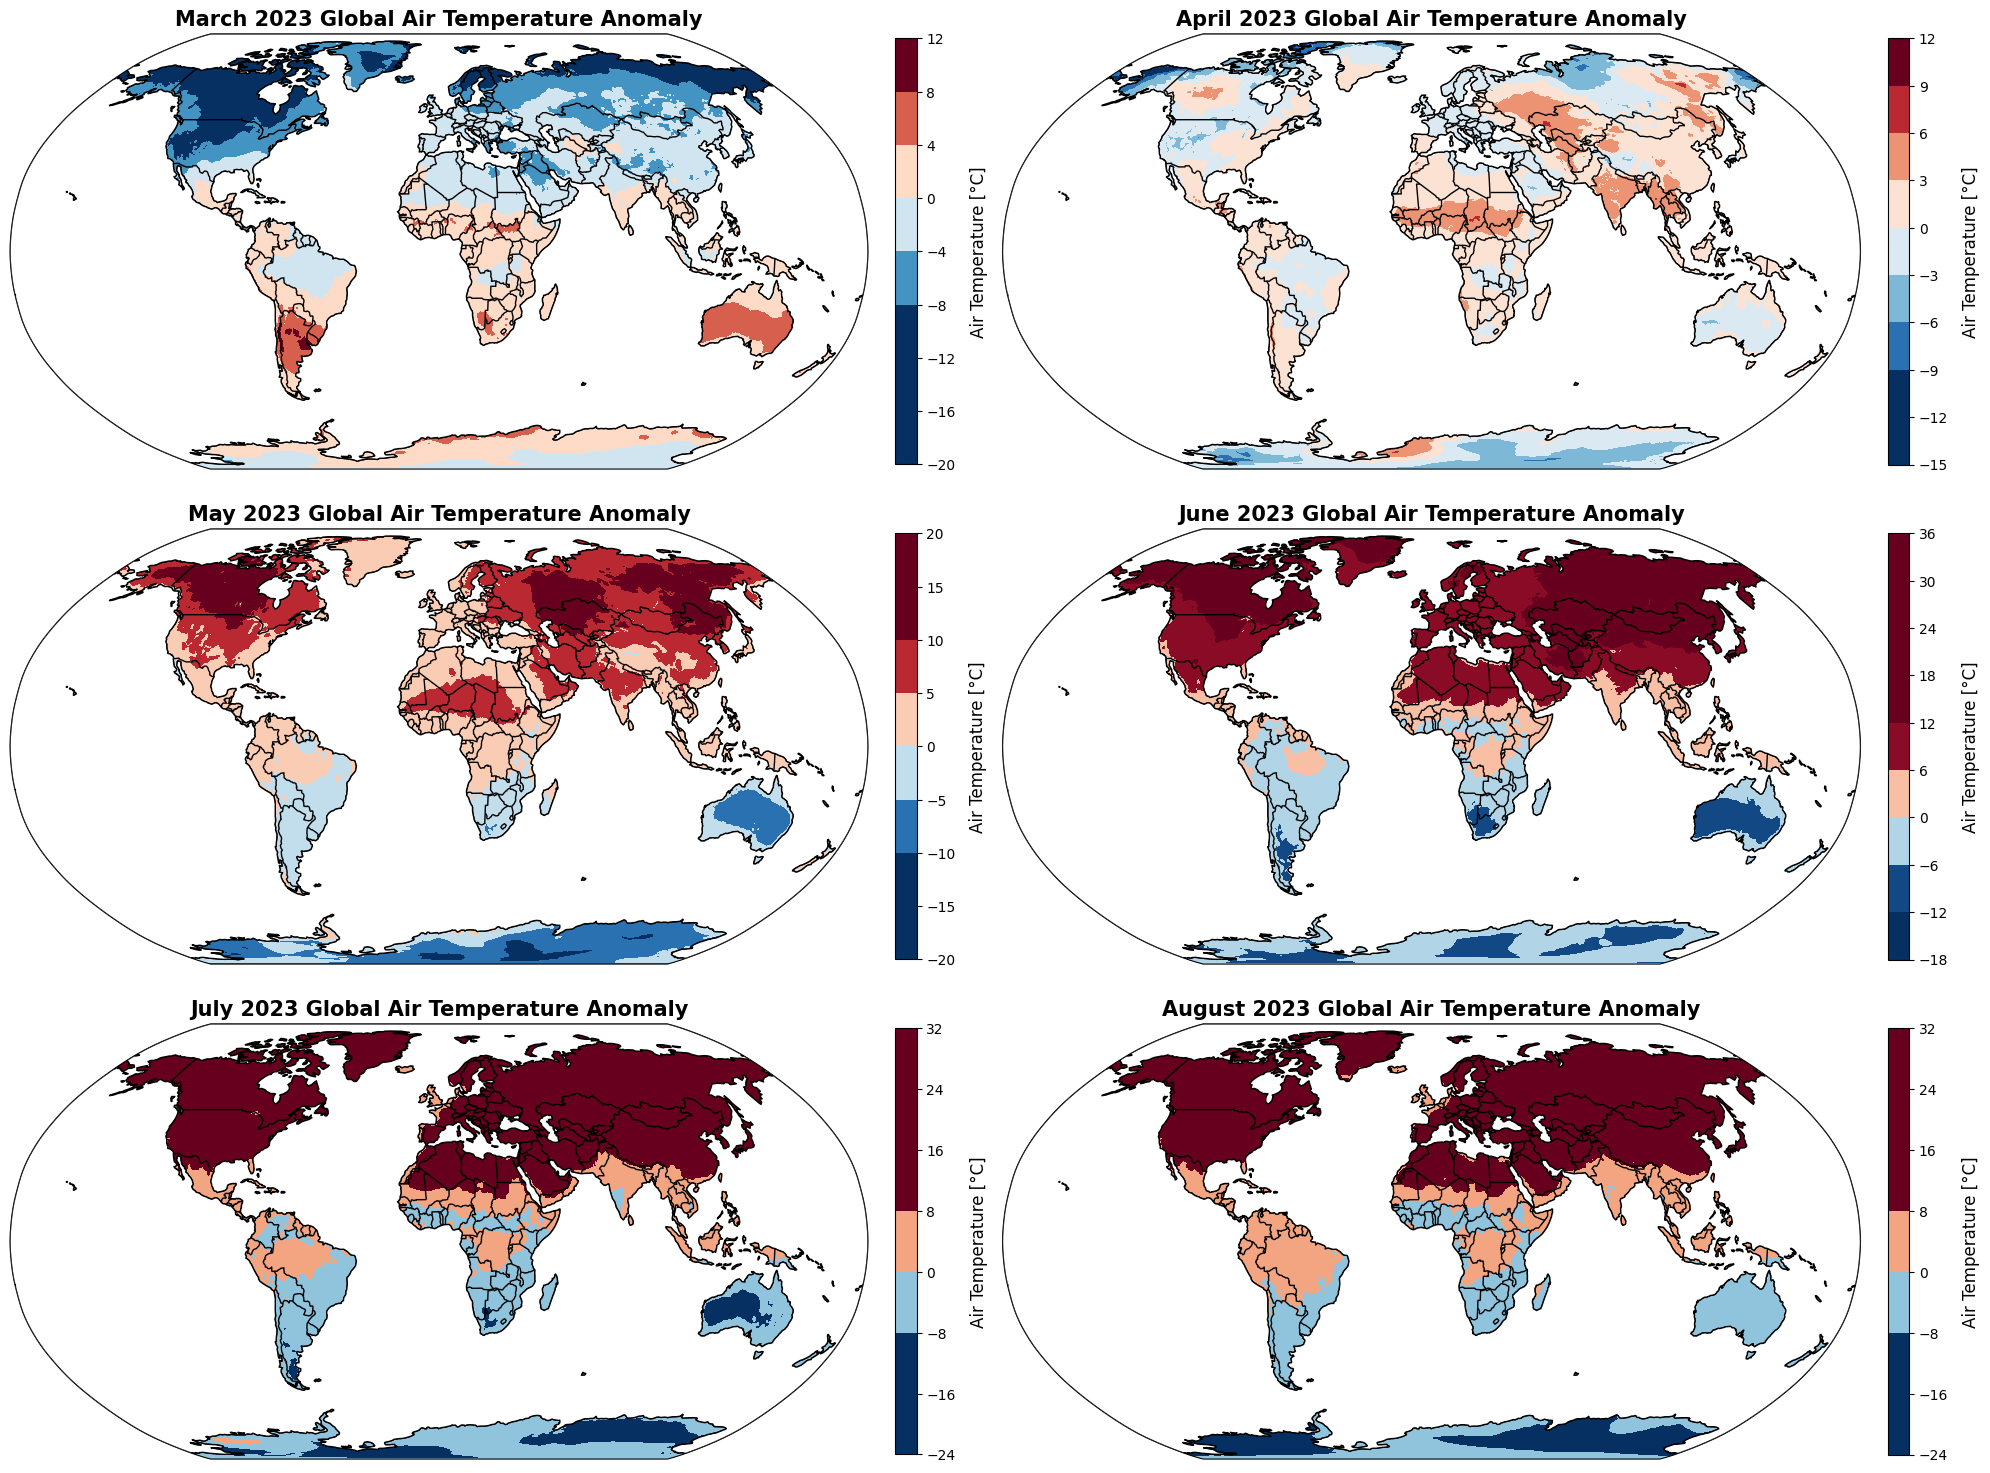

In [12]:
#define the function
def Global_plot(ERA5_dataset, title, ax):
    im = ax.contourf(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin=-10, 
                       vmax= 10,
                       cmap='RdBu_r') 
#                        shading='auto')
    
   # ax.add_feature(cf.LAND, edgecolor='black', zorder=0)
    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor = 'white')

    
    cb = plt.colorbar(im, ax=ax, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Air Temperature [°C]', fontsize=12, rotation=90, labelpad=10)

    ax.set_title(title, fontweight='bold', fontsize = '15')

# Create a 3 by 2 subplot layout
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 15),
                        subplot_kw=dict(projection=ccrs.Robinson(central_longitude = 0)))

# List of months
months = ['March', 'April', 'May', 'June', 'July', 'August']

# Iterate through each month and plot
for i, month in enumerate(months):
    row = i // 2
    col = i % 2
    
    #difference between the years
    #select the specific years needed
    t2m_1991_2020 =  era5_A['t2m'].sel(time=slice('1991', '2020')) #base period
    
    # Let's start with the current month in 2023
    current_month = '2023-{:02d}'.format(i + 3)
    t2m_month_2023 = era5_A['t2m'].sel(time=current_month)
    
    # Calculate averages
    t2m_month_2023_avg = t2m_month_2023.mean(dim='time')
    t2m_1991_2020_avg = t2m_1991_2020.mean(dim='time')
    
    # Calculate the mean difference
    t2m_diff_avg = t2m_month_2023_avg - t2m_1991_2020_avg
    
    # Plot on the corresponding subplot
    Global_plot(t2m_diff_avg, f'{month} 2023 Global Air Temperature Anomaly', axs[row, col])

plt.tight_layout()
plt.show()


### Monthly 2023 Africa Air Temperature Anomaly

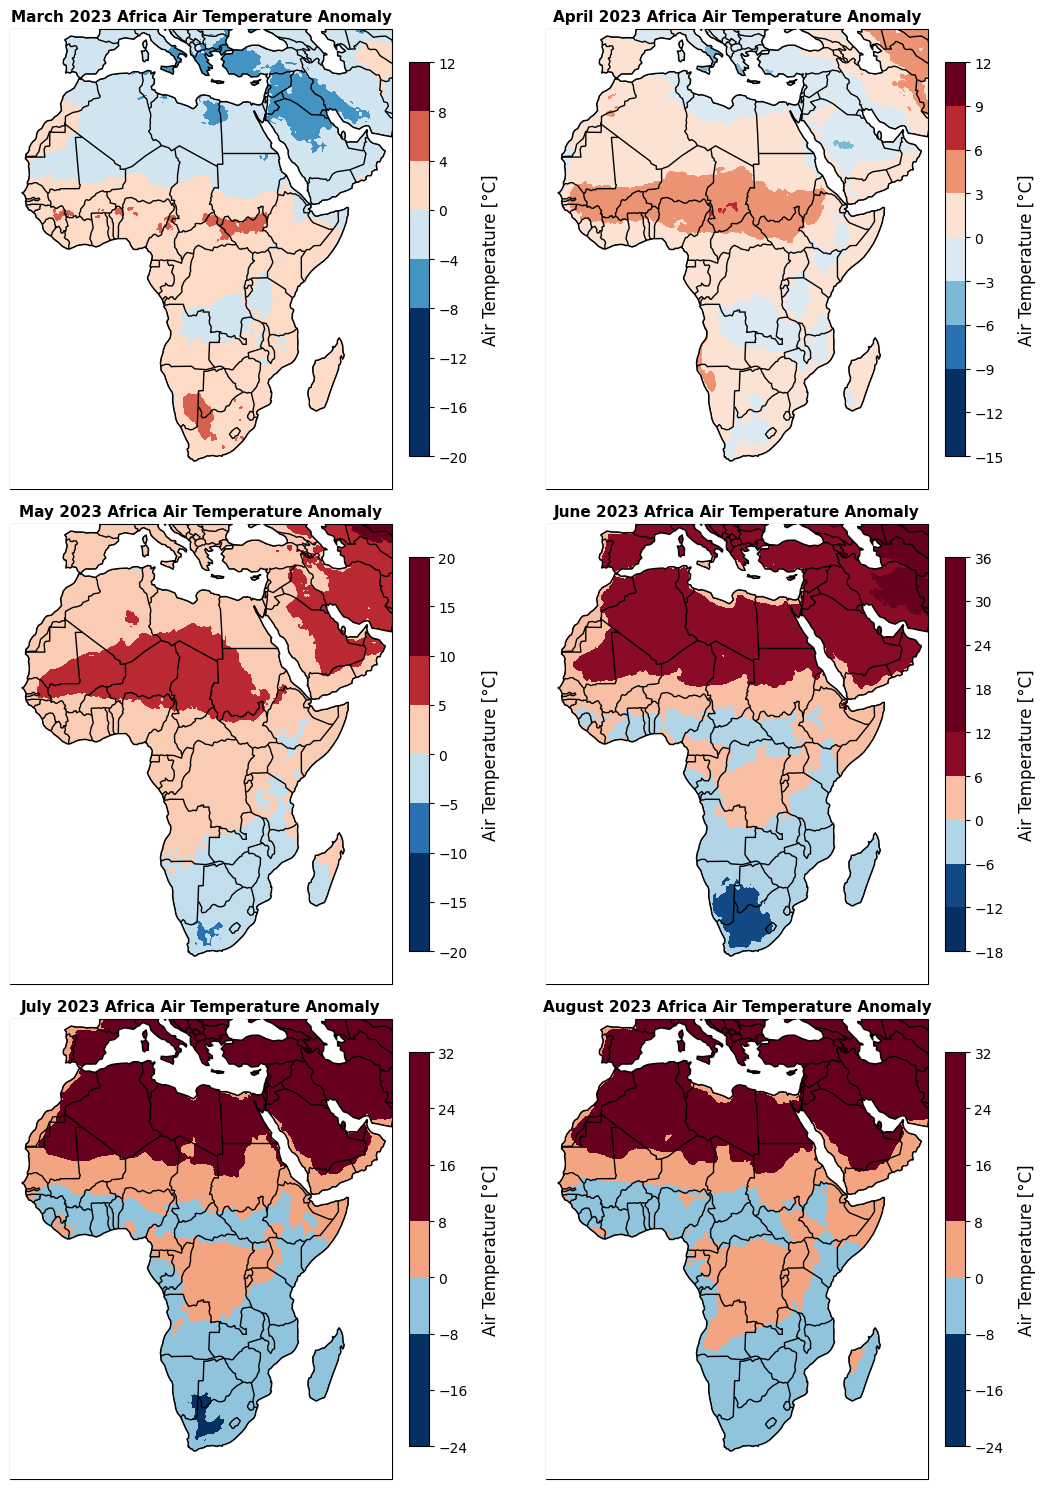

In [13]:
#define the function
def Global_plot(ERA5_dataset, title, ax):
    im = ax.contourf(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin=-10, 
                       vmax= 10,
                       cmap='RdBu_r') 
#                        shading='auto')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor = 'white')
    
    ax.set_extent([-20, 60, -40, 45], crs=ccrs.PlateCarree())  # Set extent for Africa
    
    
    cb = plt.colorbar(im, ax=ax, shrink = 3.5, fraction=0.035, pad=0.03)
    cb.set_label(label = 'Air Temperature [°C]', fontsize=12, rotation=90, labelpad=10)

    ax.set_title(title, fontweight='bold', fontsize = '11')
    

# Create a 3 by 2 subplot layout
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 15),
                        subplot_kw=dict(projection=ccrs.Robinson(central_longitude = 0)))

# List of months
months = ['March', 'April', 'May', 'June', 'July', 'August']

# Iterate through each month and plot
for i, month in enumerate(months):
    row = i // 2
    col = i % 2
    
    #difference between the years
    #select the specific years needed
    t2m_1991_2020 =  era5_A['t2m'].sel(time=slice('1991', '2020')) #base period
    
    # Let's start with the current month in 2023
    current_month = '2023-{:02d}'.format(i + 3)
    t2m_month_2023 = era5_A['t2m'].sel(time=current_month)
    
    # Calculate averages
    t2m_month_2023_avg = t2m_month_2023.mean(dim='time')
    t2m_1991_2020_avg = t2m_1991_2020.mean(dim='time')
    
    # Calculate the mean difference
    t2m_diff_avg = t2m_month_2023_avg - t2m_1991_2020_avg
    
    # Plot on the corresponding subplot
    Global_plot(t2m_diff_avg, f'{month} 2023 Africa Air Temperature Anomaly', axs[row, col])

plt.tight_layout()
plt.show()

### Monthly 2023 West Africa Air Temperature Anomaly

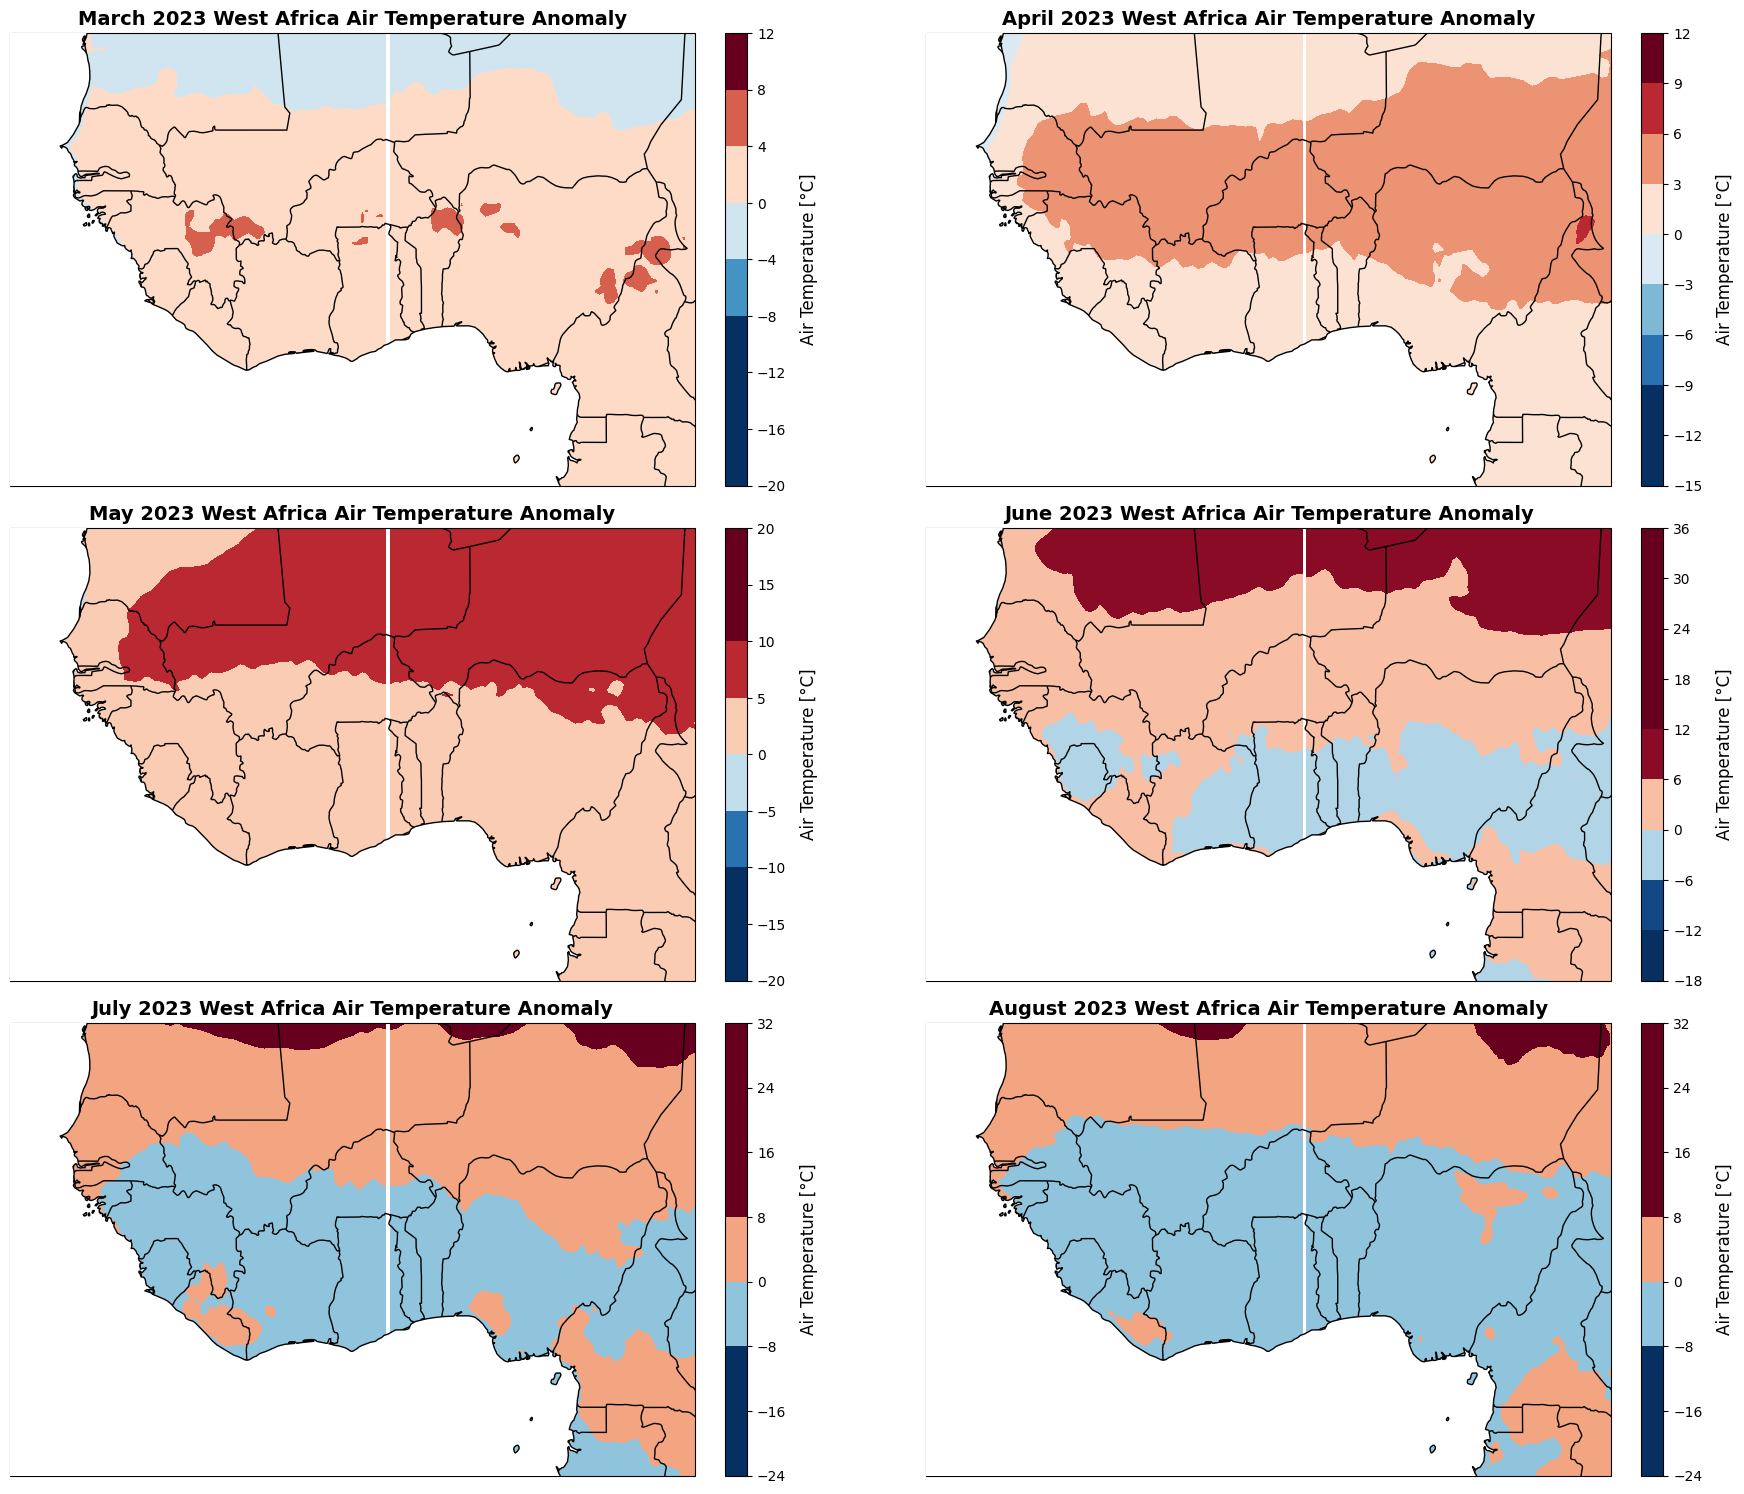

In [14]:
#define the function

def Global_plot(ERA5_dataset, title, ax):
    im = ax.contourf(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin=-10, 
                       vmax= 10,
                       cmap='RdBu_r') 
#                        shading='auto')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor='white')
    
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
    

    
    cb = plt.colorbar(im, ax=ax, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Air Temperature [°C]', fontsize=12, rotation=90, labelpad=10)

    ax.set_title(title, fontweight='bold', fontsize = '14')
    

# Create a 3 by 2 subplot layout
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,15),
                        subplot_kw=dict(projection=ccrs.Robinson(central_longitude = 0)))

# List of months
months = ['March', 'April', 'May', 'June', 'July', 'August']

# Iterate through each month and plot
for i, month in enumerate(months):
    row = i // 2
    col = i % 2
    
    #difference between the years
    #select the specific years needed
    t2m_1991_2020 =  era5_A['t2m'].sel(time=slice('1991', '2020')) #base period
    
    # Let's start with the current month in 2023
    current_month = '2023-{:02d}'.format(i + 3)
    t2m_month_2023 = era5_A['t2m'].sel(time=current_month)
    
    # Calculate averages
    t2m_month_2023_avg = t2m_month_2023.mean(dim='time')
    t2m_1991_2020_avg = t2m_1991_2020.mean(dim='time')
    
    # Calculate the mean difference
    t2m_diff_avg = t2m_month_2023_avg - t2m_1991_2020_avg
    
    # Plot on the corresponding subplot
    Global_plot(t2m_diff_avg, f'{month} 2023 West Africa Air Temperature Anomaly', axs[row, col])

plt.tight_layout()
plt.show()

### Monthly 2022 West Africa Air Temperature Anomaly

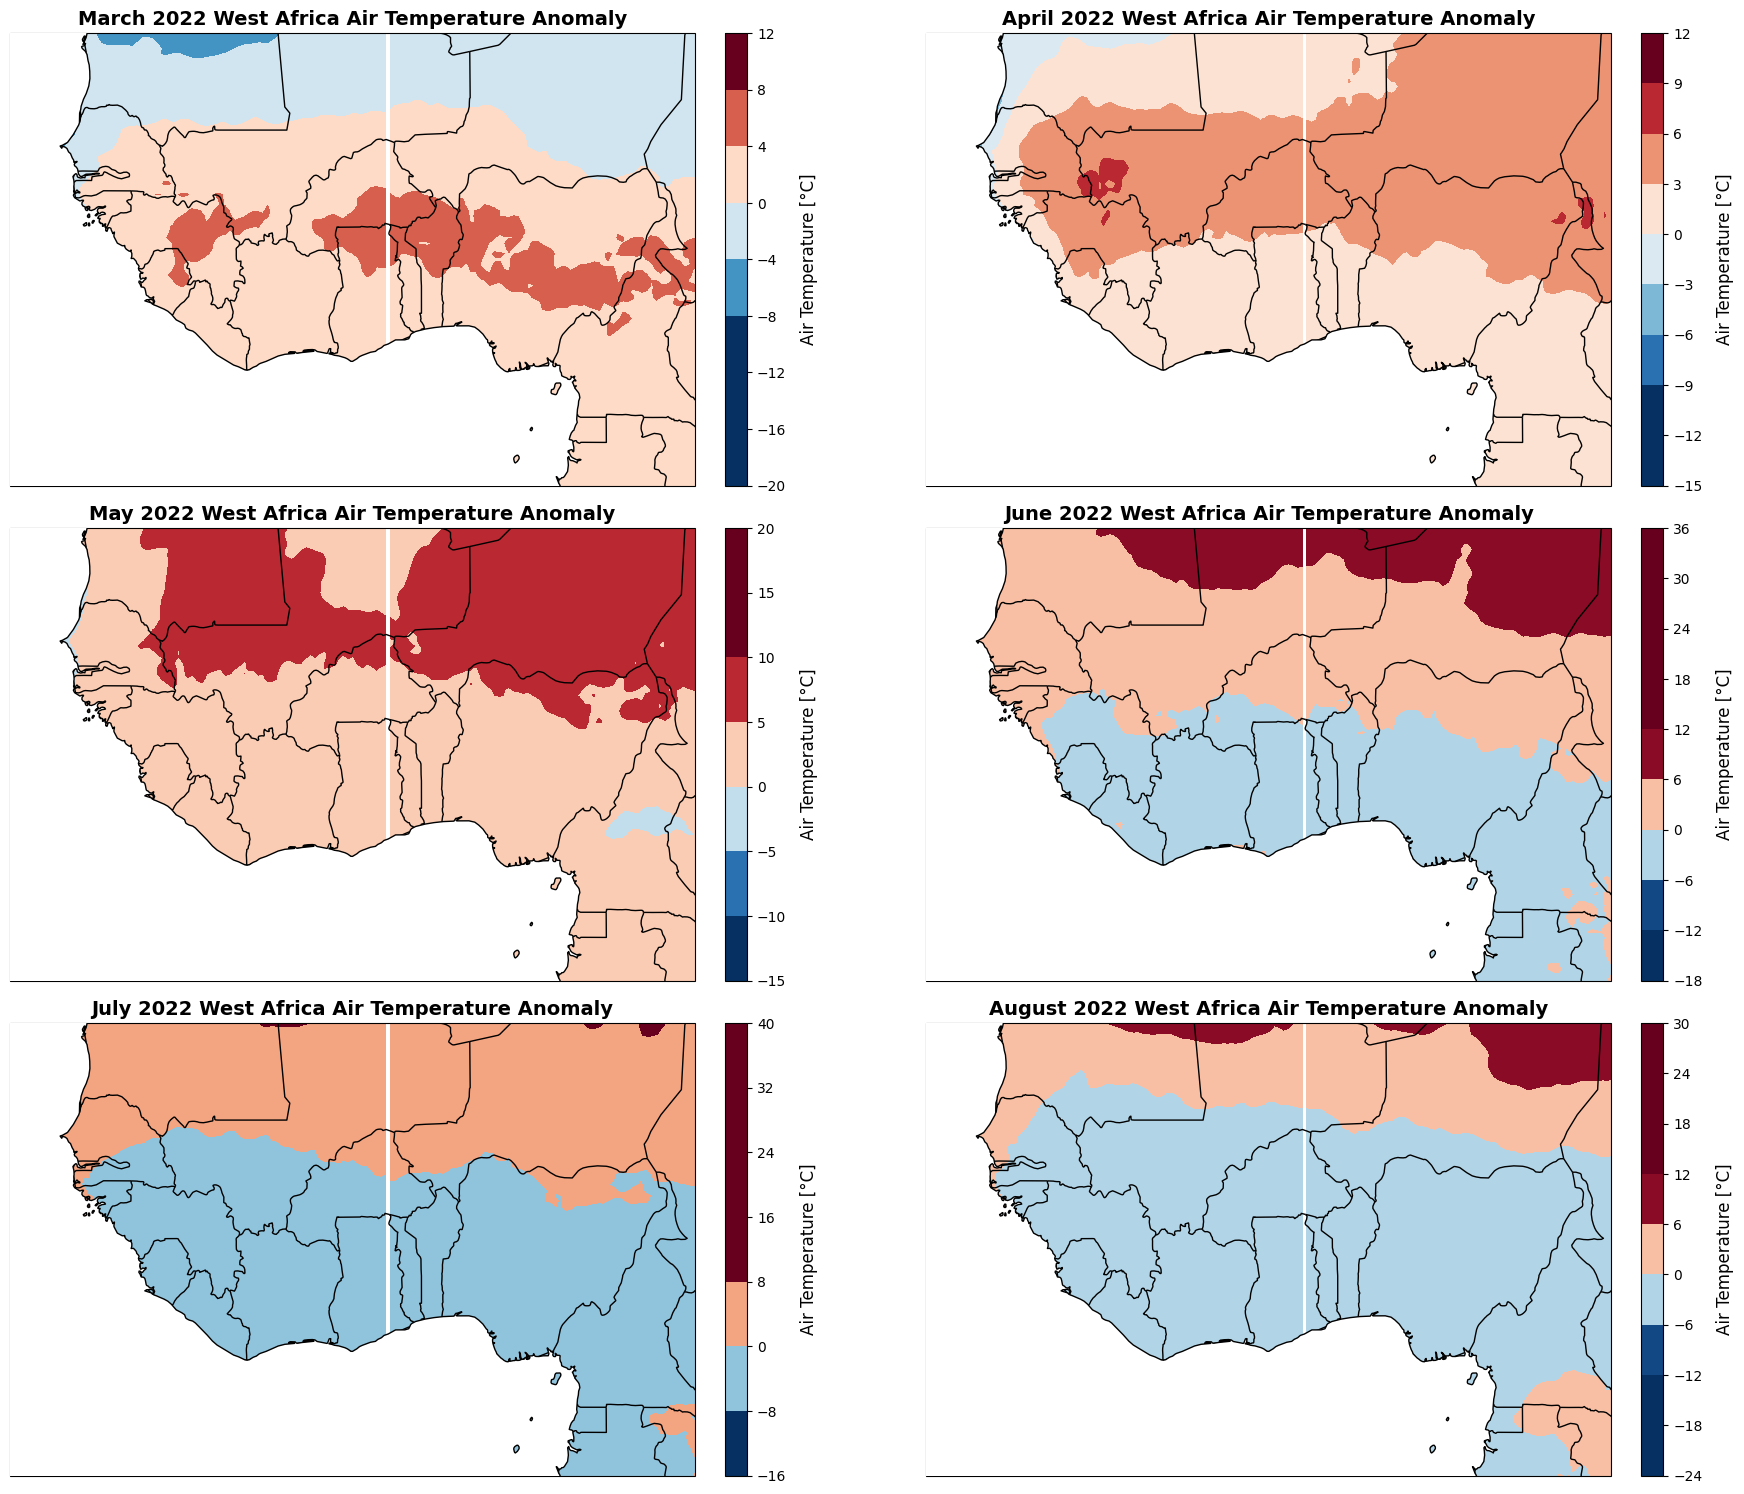

In [11]:
#define the function
def Global_plot(ERA5_dataset, title, ax):
    im = ax.contourf(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin=-10, 
                       vmax= 10,
                       cmap='RdBu_r') 
#                        shading='auto')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor='white')
    
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
    

    
    cb = plt.colorbar(im, ax=ax, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Air Temperature [°C]', fontsize=12, rotation=90, labelpad=10)

    ax.set_title(title, fontweight='bold', fontsize = '14')
    

# Create a 3 by 2 subplot layout
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,15),
                        subplot_kw=dict(projection=ccrs.Robinson(central_longitude = 0)))

# List of months
months = ['March', 'April', 'May', 'June', 'July', 'August']

# Iterate through each month and plot
for i, month in enumerate(months):
    row = i // 2
    col = i % 2
    
    #difference between the years
    #select the specific years needed
    t2m_1991_2020 =  era5_A['t2m'].sel(time=slice('1991', '2020')) #base period
    
    # Let's start with the current month in 2023
    current_month = '2022-{:02d}'.format(i + 3)
    t2m_month_2023 = era5_A['t2m'].sel(time=current_month)
    
    # Calculate averages
    t2m_month_2023_avg = t2m_month_2023.mean(dim='time')
    t2m_1991_2020_avg = t2m_1991_2020.mean(dim='time')
    
    # Calculate the mean difference
    t2m_diff_avg = t2m_month_2023_avg - t2m_1991_2020_avg
    
    # Plot on the corresponding subplot
    Global_plot(t2m_diff_avg, f'{month} 2022 West Africa Air Temperature Anomaly', axs[row, col])

plt.tight_layout()
plt.show()

### Monthly 2021 West Africa Air Temperature Anomaly

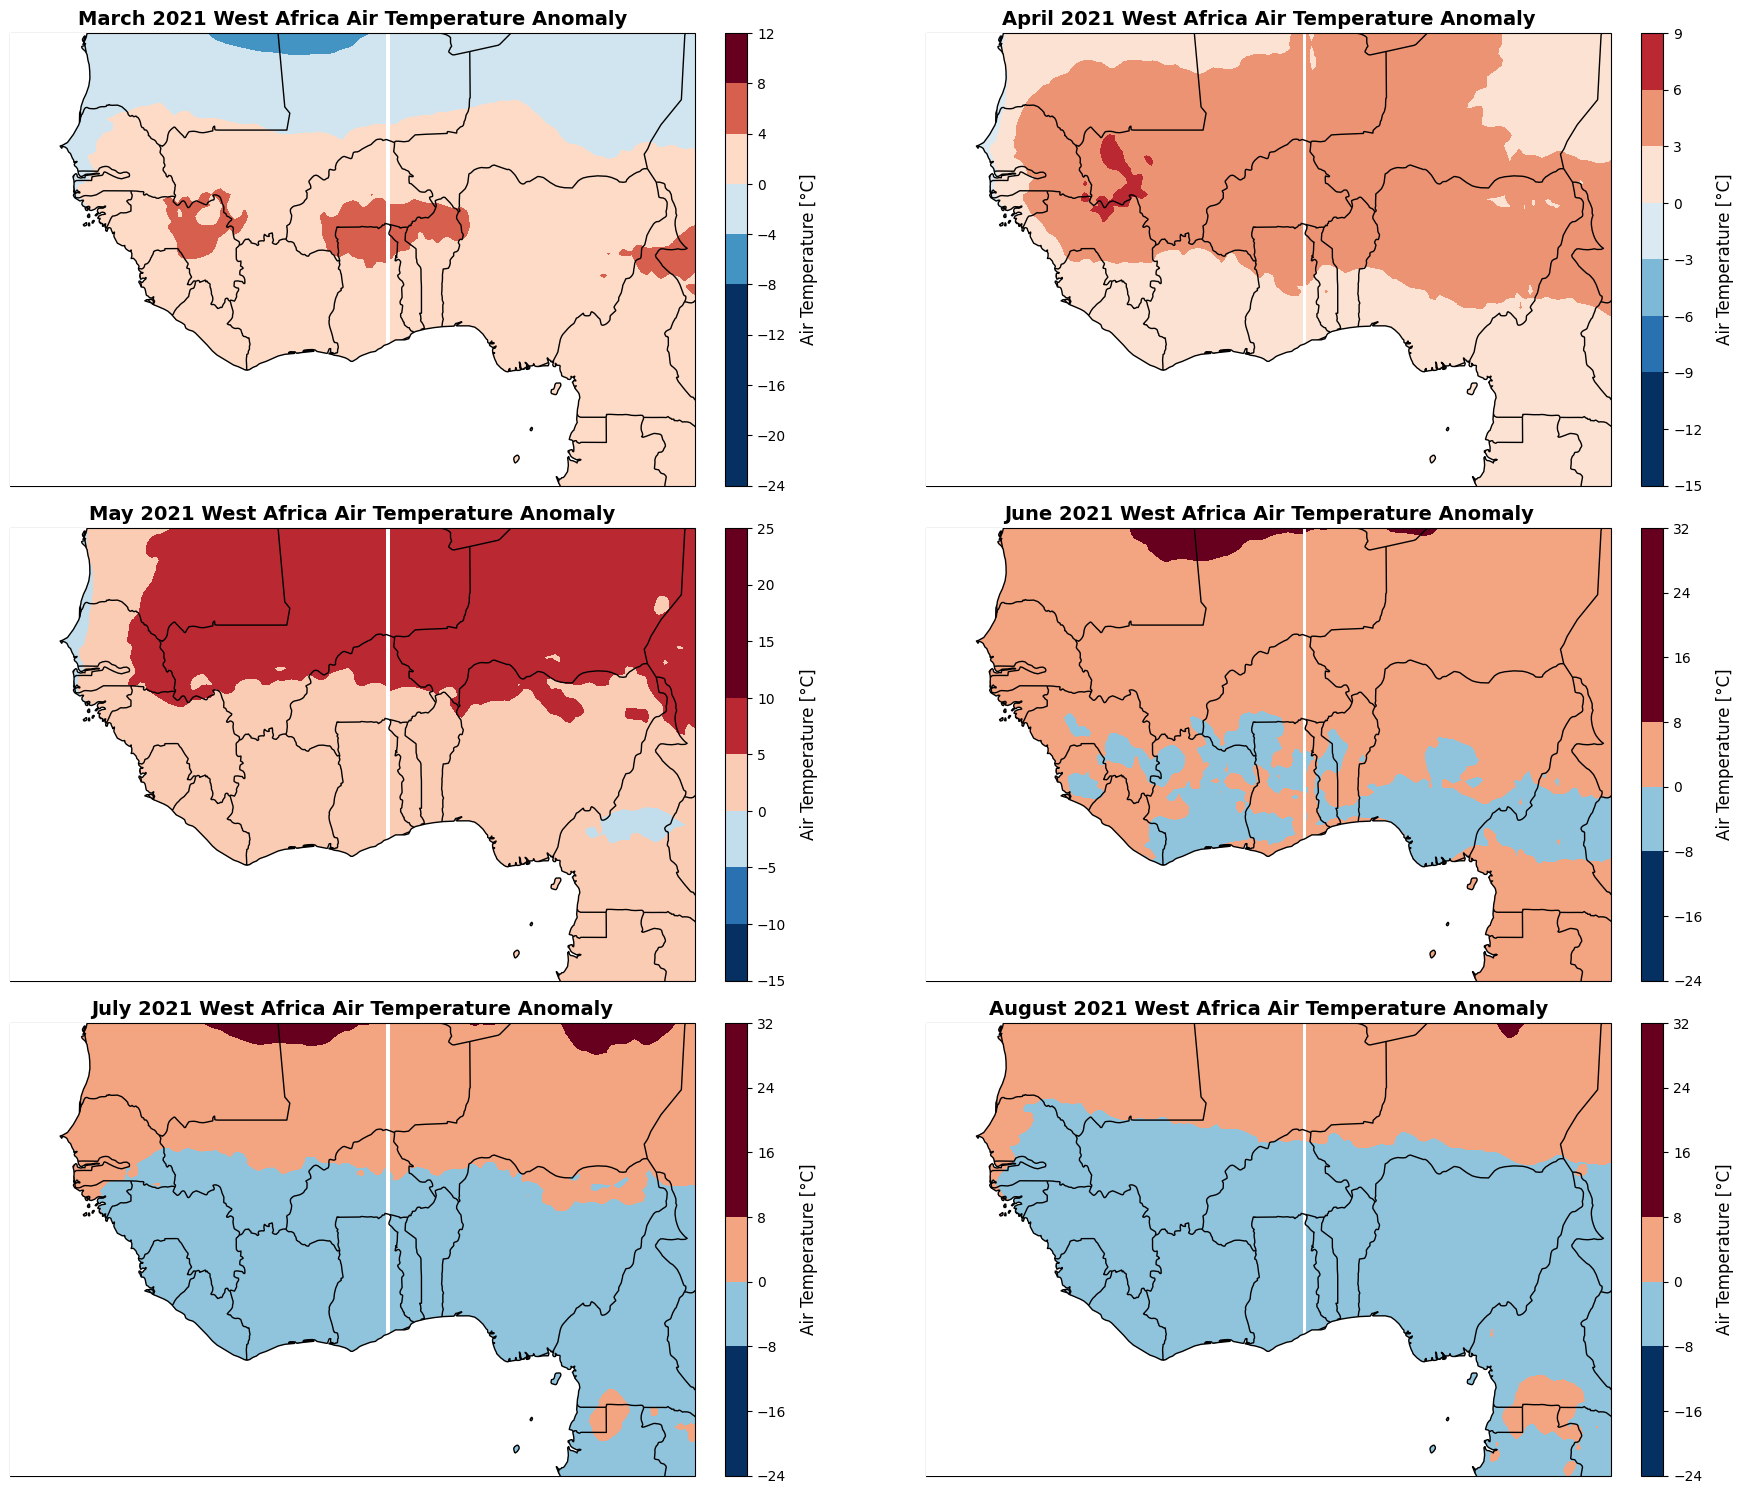

In [10]:
#define the function
def Global_plot(ERA5_dataset, title, ax):
    im = ax.contourf(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin=-10, 
                       vmax= 10,
                       cmap='RdBu_r') 
#                        shading='auto')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor='white')
    
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
    
    
    cb = plt.colorbar(im, ax=ax, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Air Temperature [°C]', fontsize=12, rotation=90, labelpad=10)

    ax.set_title(title, fontweight='bold', fontsize = '14')
    

# Create a 3 by 2 subplot layout
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,15),
                        subplot_kw=dict(projection=ccrs.Robinson(central_longitude = 0)))

# List of months
months = ['March', 'April', 'May', 'June', 'July', 'August']

# Iterate through each month and plot
for i, month in enumerate(months):
    row = i // 2
    col = i % 2
    
    #difference between the years
    #select the specific years needed
    t2m_1991_2020 =  era5_A['t2m'].sel(time=slice('1991', '2020')) #base period
    
    # Let's start with the current month in 2023
    current_month = '2021-{:02d}'.format(i + 3)
    t2m_month_2023 = era5_A['t2m'].sel(time=current_month)
    
    # Calculate averages
    t2m_month_2023_avg = t2m_month_2023.mean(dim='time')
    t2m_1991_2020_avg = t2m_1991_2020.mean(dim='time')
    
    # Calculate the mean difference
    t2m_diff_avg = t2m_month_2023_avg - t2m_1991_2020_avg
    
    # Plot on the corresponding subplot
    Global_plot(t2m_diff_avg, f'{month} 2021 West Africa Air Temperature Anomaly', axs[row, col])

plt.tight_layout()
plt.show()

### Monthly 2023-2022 West Africa Air Temperature Difference

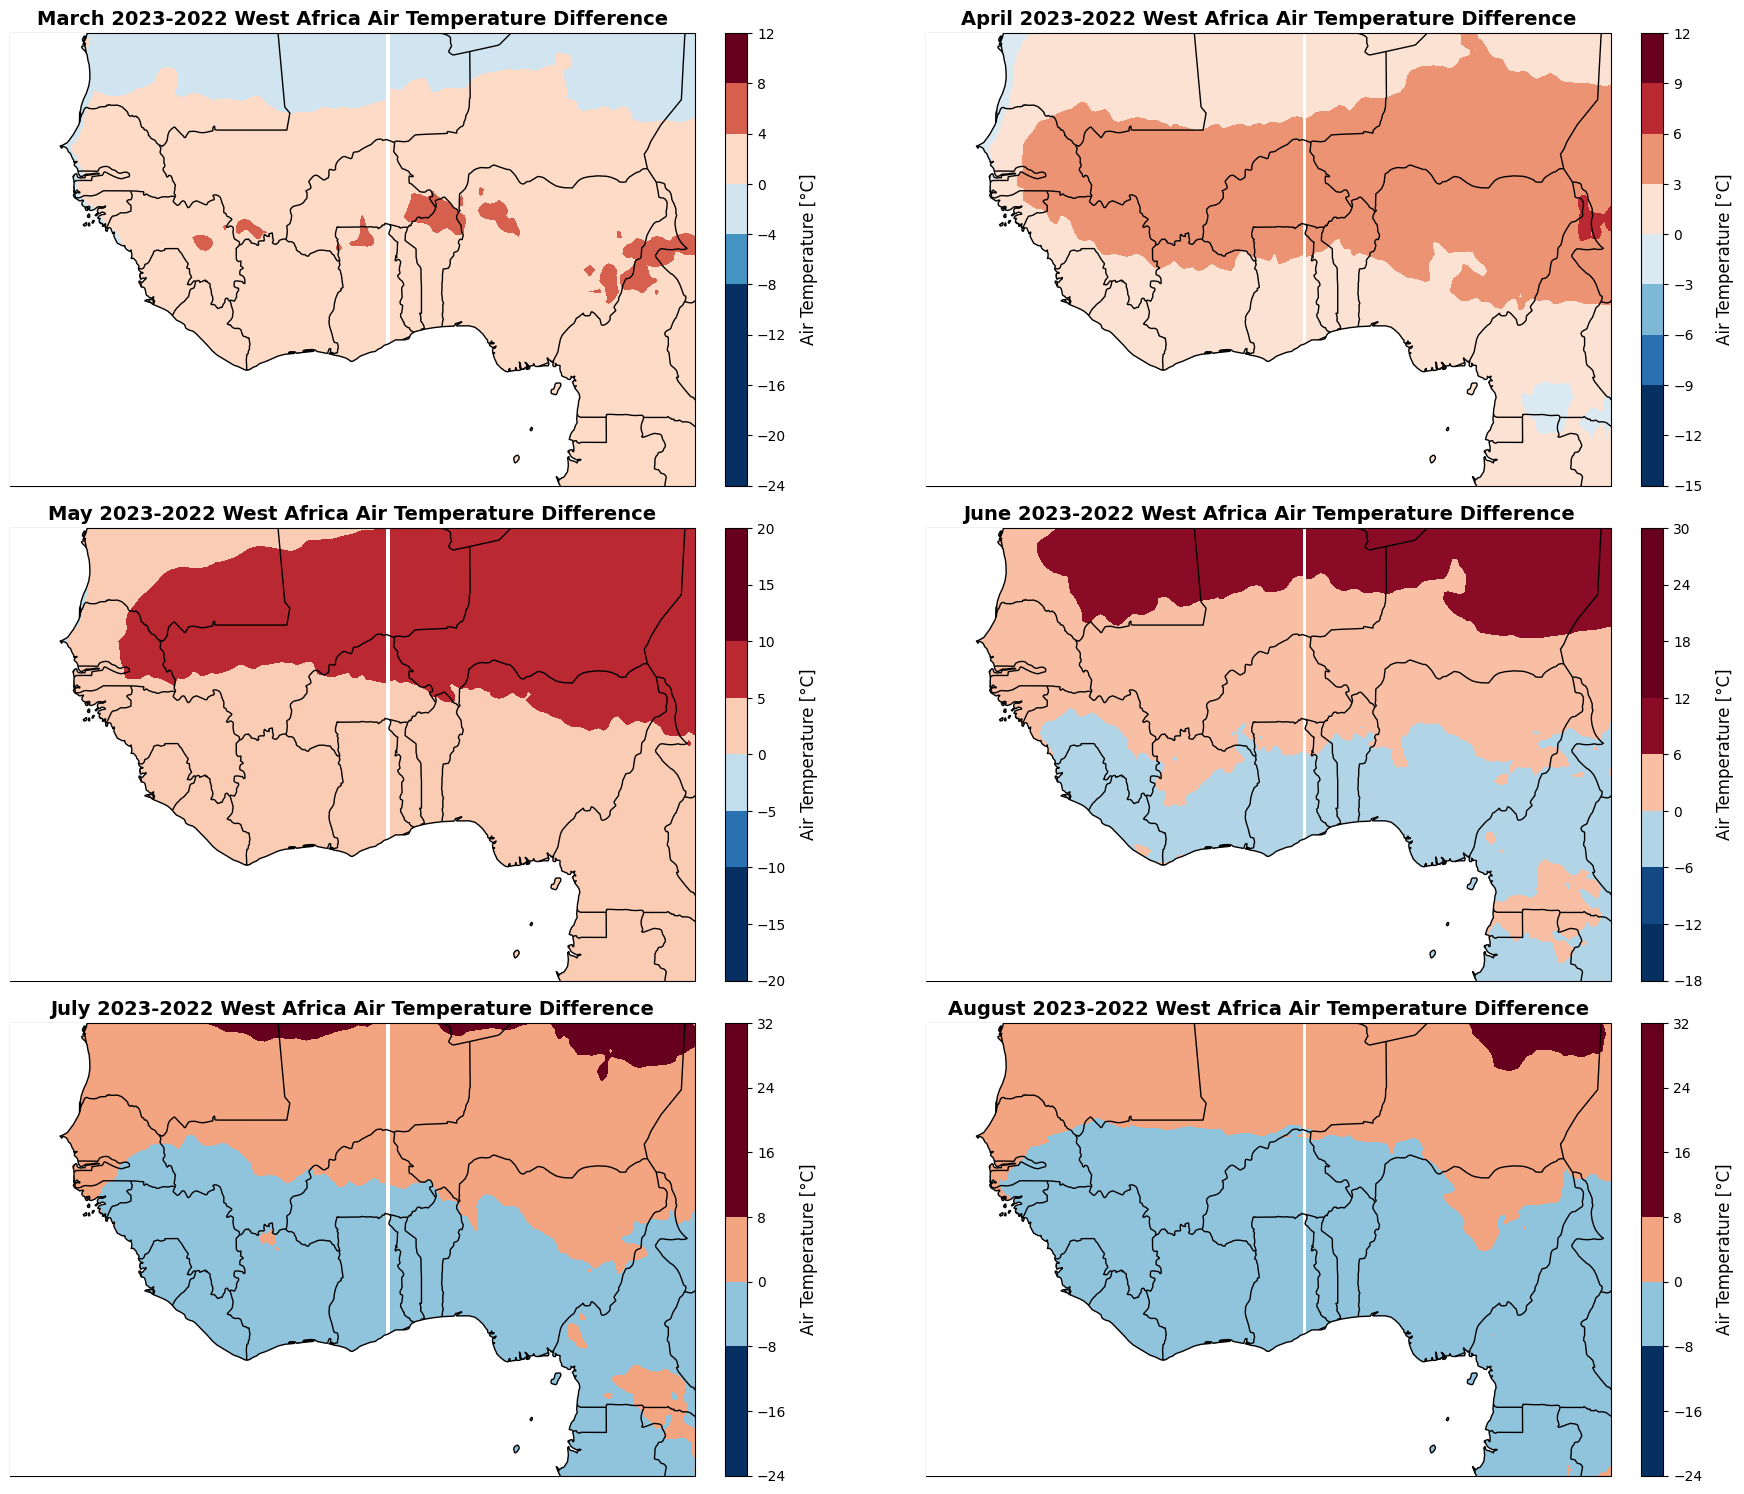

In [9]:
#define the function
def Global_plot(ERA5_dataset, title, ax):
    im = ax.contourf(ERA5_dataset.longitude, 
                       ERA5_dataset.latitude, 
                       ERA5_dataset,
                       transform=ccrs.PlateCarree(), 
                       vmin=-10, 
                       vmax= 10,
                       cmap='RdBu_r') 
#                        shading='auto')

    ax.add_feature(cf.BORDERS)
    ax.coastlines(resolution='110m')
    ax.add_feature(cf.OCEAN, edgecolor='black', zorder=100, facecolor='white')
    
    ax.set_extent([-20, 16, -1, 20], crs=ccrs.PlateCarree())  # Set extent for West Africa
    

    
    cb = plt.colorbar(im, ax=ax, fraction=0.0235, pad=0.03)
    cb.set_label(label = 'Air Temperature [°C]', fontsize=12, rotation=90, labelpad=10)

    ax.set_title(title, fontweight='bold', fontsize = '14')
    

# Create a 3 by 2 subplot layout
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20,15),
                        subplot_kw=dict(projection=ccrs.Robinson(central_longitude = 0)))

# List of months
months = ['March', 'April', 'May', 'June', 'July', 'August']

# Iterate through each month and plot
for i, month in enumerate(months):
    row = i // 2
    col = i % 2
    
    #difference between the years
    #select the specific years needed
    t2m_1991_2020 =  era5_A['t2m'].sel(time= '2022') #base period
    
    # Let's start with the current month in 2023
    current_month = '2023-{:02d}'.format(i + 3)
    t2m_month_2023 = era5_A['t2m'].sel(time=current_month)
    
    # Calculate averages
    t2m_month_2023_avg = t2m_month_2023.mean(dim='time')
    t2m_1991_2020_avg = t2m_1991_2020.mean(dim='time')
    
    # Calculate the mean difference
    t2m_diff_avg = t2m_month_2023_avg - t2m_1991_2020_avg
    
    # Plot on the corresponding subplot
    Global_plot(t2m_diff_avg, f'{month} 2023-2022 West Africa Air Temperature Difference', axs[row, col])

plt.tight_layout()
plt.show()

## Gobal Time Series Analysis

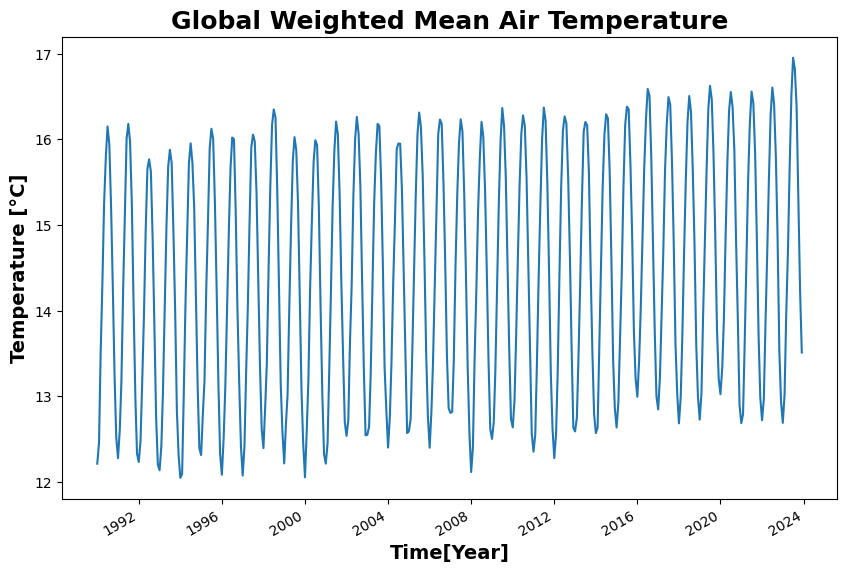

In [29]:

# Calculate weights
weights = np.cos(np.deg2rad(era5_A['t2m'].latitude))
weights.name = "weights"

# Apply weights to the dataset
t2m_weighted = era5_A['t2m'].weighted(weights)

# Calculate the weighted mean
t2m_mean = t2m_weighted.mean(["longitude", "latitude"])

# Plot the mean using a line plot
plt.figure(figsize = (10,6))
t2m_mean.plot()
plt.title('Global Weighted Mean Air Temperature', fontweight = 'bold', fontsize = '18')
plt.xlabel('Time[Year]', fontweight = 'bold', fontsize = '14')
plt.ylabel('Temperature [°C]', fontweight = 'bold', fontsize = '14')
plt.show()

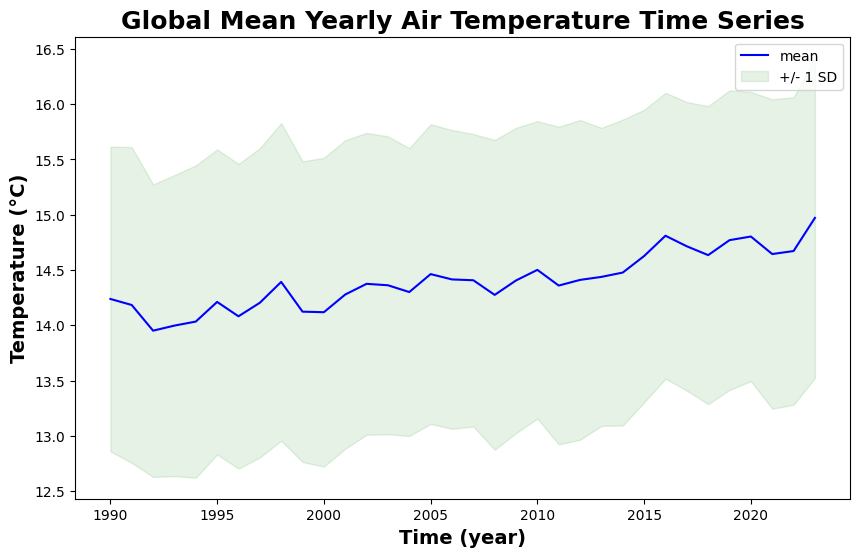

In [28]:

#calculate mean
t2m_yearly = t2m_mean.groupby('time.year').mean() 

#calculate standard deviation
std = t2m_mean.groupby('time.year').std()

#plotting
fig, ax = plt.subplots(1, 1, figsize = (10, 6))

ax.plot(t2m_yearly.year, t2m_yearly, color='blue', label='mean')

ax.fill_between(t2m_yearly.year, (t2m_yearly + std), (t2m_yearly - std), alpha=0.1, color='green', label='+/- 1 SD')


plt.title('Global Mean Yearly Air Temperature Time Series', fontweight='bold', fontsize = '18')
plt.xlabel('Time (year)', fontweight='bold', fontsize = '14')
plt.ylabel('Temperature (°C)', fontweight='bold', fontsize = '14')
plt.legend()


## Bar chart to visualize the time series of anomalies

Text(0, 0.5, 'Air Temperature [°C]')

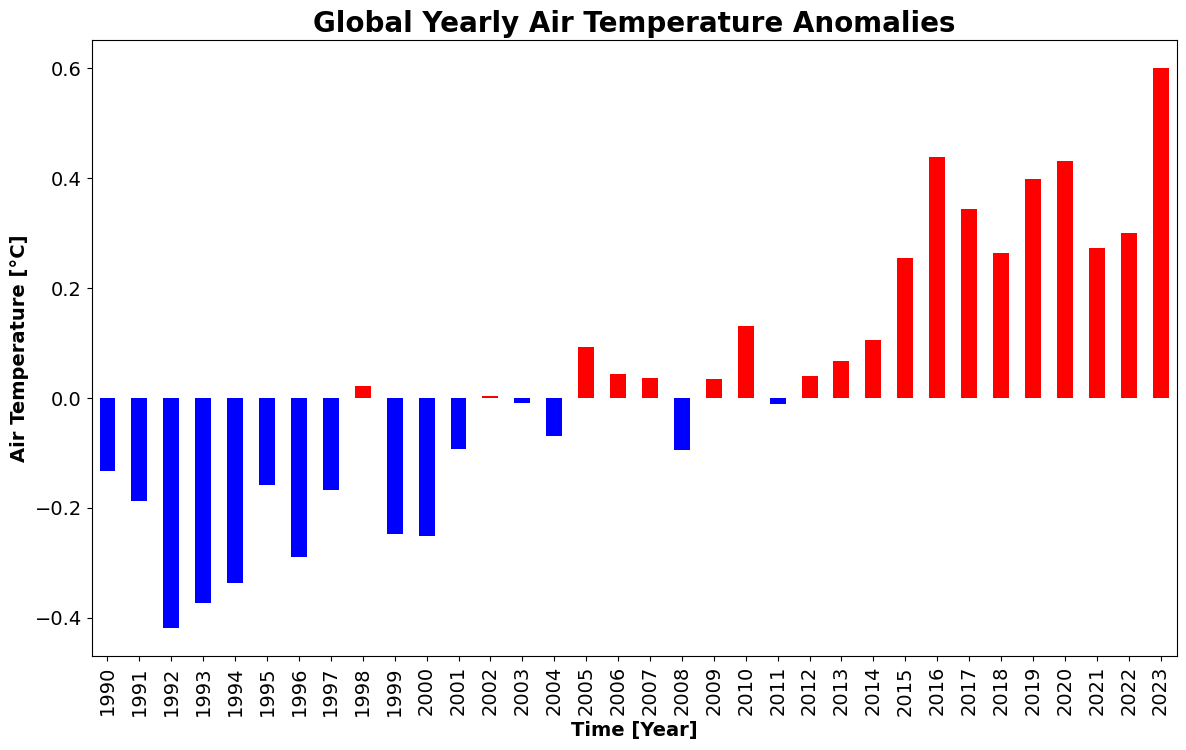

In [37]:
#calculate mean
t2m_yearly = t2m_mean.groupby('time.year').mean() 

t2m_subset = t2m_yearly.where((t2m_yearly.year > 1990) & (t2m_yearly.year < 2021), drop=True)
t2m_clim = t2m_subset.mean()
t2m_anom = t2m_yearly - t2m_clim

df = t2m_anom.to_dataframe()
df['positive'] = df['t2m'] > 0
df.head() # show only first five rows


plt.rcParams.update({'font.size': 20}) # must set in top
# Create the plot
ax = df['t2m'].plot(
    figsize=(14, 8),
    kind='bar',
    color=df.positive.map({True: 'red', False: 'blue'}),
    fontsize=14
)

# Set the title 
ax.set_title('Global Yearly Air Temperature Anomalies', fontweight='bold', fontsize='20')

# Set the x-label and y-label 
ax.set_xlabel('Time [Year]', fontweight='bold', fontsize=14)
ax.set_ylabel('Air Temperature [°C]', fontweight='bold', fontsize=14)

## West Africa Time Series Analysis

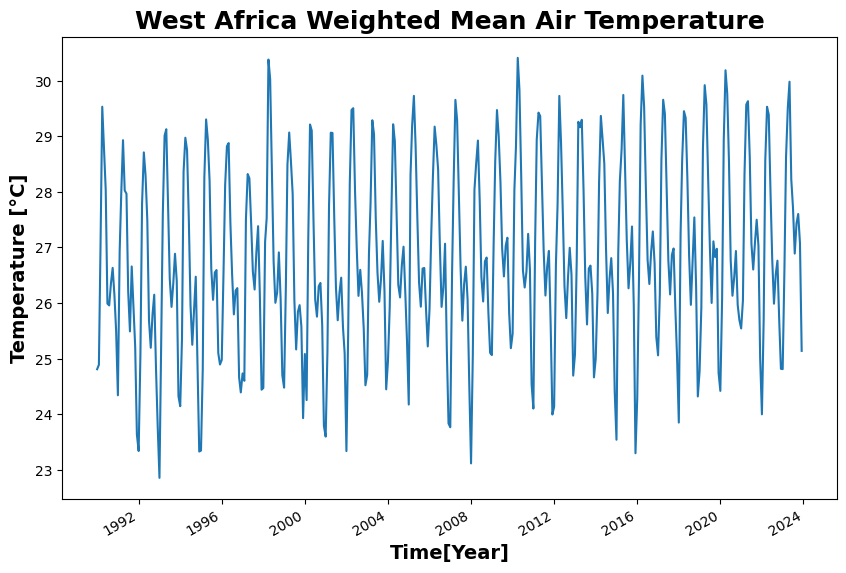

In [27]:
west_africa_t2m = era5_A.sel(longitude = slice(-20, 16), latitude = slice(18, -1))

# Calculate weights
weights1 = np.cos(np.deg2rad(west_africa_t2m['t2m'].latitude))
weights1.name = "weights1"

# Apply weights to the dataset
t2m_weighted1 = west_africa_t2m['t2m'].weighted(weights1)

# Calculate the weighted mean
t2m_mean1 = t2m_weighted1.mean(["longitude", "latitude"])

# Plot the mean using a line plot
plt.figure(figsize=(10,6))
t2m_mean1.plot()
plt.title('West Africa Weighted Mean Air Temperature', fontweight = 'bold', fontsize = '18')
plt.xlabel('Time[Year]',fontweight = 'bold' , fontsize = '14')
plt.ylabel('Temperature [°C]', fontweight = 'bold', fontsize = '14')
plt.show()

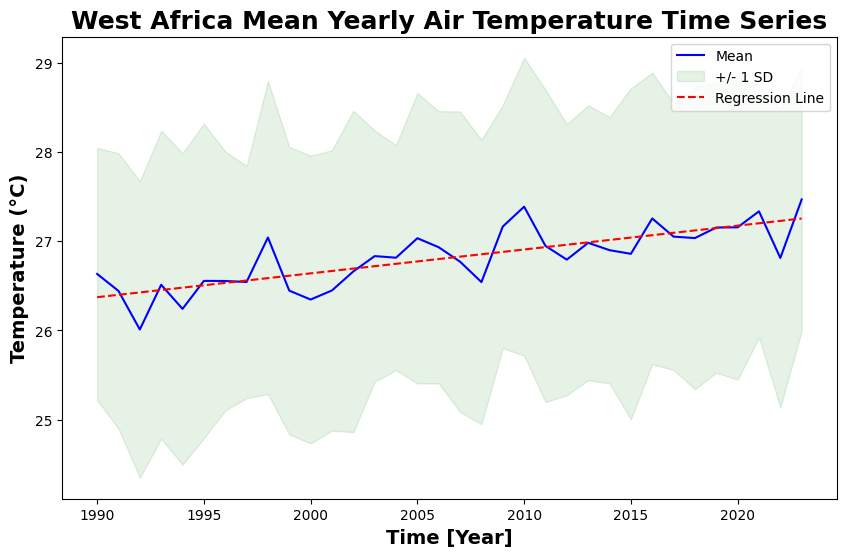

In [30]:

# Calculate mean
t2m_yearly1 = t2m_mean1.groupby('time.year').mean()

# Calculate standard deviation
std1 = t2m_mean1.groupby('time.year').std()

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.plot(t2m_yearly1.year, t2m_yearly1, color='blue', label='Mean')
ax.fill_between(t2m_yearly1.year, (t2m_yearly1 + std1), (t2m_yearly1 - std1), alpha=0.1, color='green', label='+/- 1 SD')

# Prepare data for regression line
years = t2m_yearly1.year.values
temperatures = t2m_yearly1.values
slope, intercept = np.polyfit(years, temperatures, 1)
regression_line = slope * years + intercept

# Plot regression line
ax.plot(years, regression_line, color='red', linestyle='--', label='Regression Line')

plt.title('West Africa Mean Yearly Air Temperature Time Series', fontweight='bold', fontsize = '18')
plt.xlabel('Time [Year]', fontweight='bold', fontsize = '14')
plt.ylabel('Temperature (°C)', fontweight='bold', fontsize = '14')
plt.legend()

plt.show()


## Bar chart to visualize the time series of anomalies

In [31]:
t2m_subset = t2m_yearly1.where((t2m_yearly1.year > 1990) & (t2m_yearly1.year < 2021), drop=True)
t2m_clim = t2m_subset.mean()
t2m_anom = t2m_yearly1 - t2m_clim

df = t2m_anom.to_dataframe()
df['positive'] = df['t2m'] > 0
df.head() # show only first five rows

t2m  positive
year                    
1990 -0.146919     False
1991 -0.337772     False
1992 -0.770239     False
1993 -0.268881     False
1994 -0.538906     False

In [14]:
# t2m_subset = t2m_yearly1.where((t2m_yearly1.year > 1990) & (t2m_yearly1.year < 2021), drop=True)
# t2m_clim = t2m_subset.mean()
# t2m_anom = t2m_yearly1 - t2m_clim

# df = t2m_anom.to_dataframe()
# df['positive'] = df['t2m'] > 0
# df.head() # show only first five rows

Text(0, 0.5, 'Air Temperature [°C]')

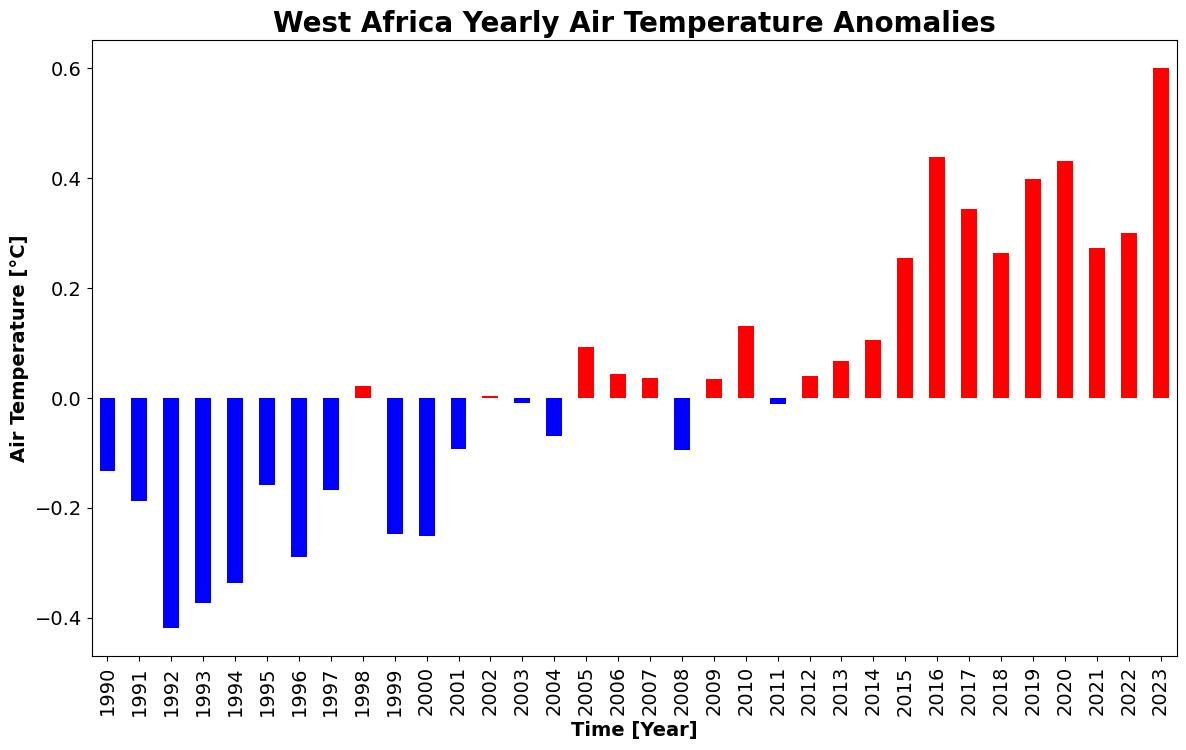

In [36]:



plt.rcParams.update({'font.size': 20}) # must set in top
# Create the plot
ax = df['t2m'].plot(
    figsize=(14, 8),
    kind='bar',
    color=df.positive.map({True: 'red', False: 'blue'}),
    fontsize=14
)

# Set the title 
ax.set_title('West Africa Yearly Air Temperature Anomalies', fontweight='bold', fontsize='20')

# Set the x-label and y-label 
ax.set_xlabel('Time [Year]', fontweight='bold', fontsize=14)
ax.set_ylabel('Air Temperature [°C]', fontweight='bold', fontsize=14)

## Time series comparing 2023 and 2022

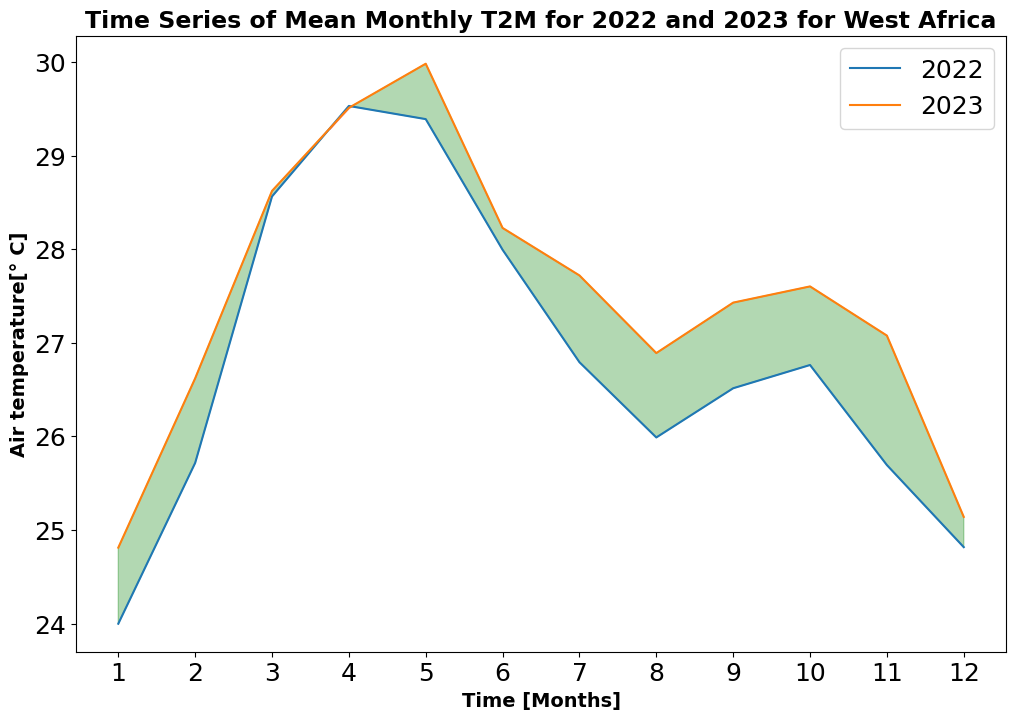

In [18]:
#extracting data for westa frica
west_t2m = era5_A.sel(longitude = slice(-20, 16), latitude = slice(18, -1))

# Assuming 'west_tp' and necessary transformations have already been loaded correctly
weights = np.cos(np.deg2rad(west_t2m.latitude))
weights.name = "weights"
west_t2m_weighted = west_t2m.weighted(weights)

# Calculate mean over the region
WestAfrica_t2m = west_t2m_weighted.mean(["longitude", "latitude"])

# Select the year 2022 and 2023
WestAfrica_2022 = WestAfrica_t2m.sel(time=slice('2022-01-01', '2022-12-31'))
WestAfrica_2023 = WestAfrica_t2m.sel(time=slice('2023-01-01', '2023-12-31'))

# Group by month and calculate mean precipitation for each month for both years
WestAfrica_2022_t2m = WestAfrica_2022.groupby('time.month').mean()
WestAfrica_2023_t2m = WestAfrica_2023.groupby('time.month').mean()

# Extracting precipitation values correctly for both years
temp_2022 = WestAfrica_2022_t2m.t2m.values  # Accessing the 't2m' data variable for 2022
temp_2023 = WestAfrica_2023_t2m.t2m.values  # Accessing the 't2m' data variable for 2023

# Now, prepare to plot
months = np.arange(1, 13)  # Months from January to December

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(months, temp_2022, label='2022')  # Plot for 2022
ax.plot(months, temp_2023, label='2023')  # Plot for 2023
ax.set_title('Time Series of Mean Monthly T2M for 2022 and 2023 for West Africa', fontweight='bold', fontsize='17')
ax.set_ylabel('Air temperature[° C]', fontweight='bold', fontsize='14')
ax.set_xlabel('Time [Months]', fontweight='bold', fontsize='14')
ax.set_xticks(months)  # Set x-ticks to show each month
# ax.grid(linestyle='--')

# Fill between plots with interpolation
ax.fill_between(months, temp_2022, temp_2023, where=(temp_2023 > temp_2022), color='green', alpha=0.3, interpolate=True)
ax.fill_between(months, temp_2022, temp_2023, where=(temp_2023 <= temp_2022), color='red', alpha=0.3, interpolate=True)

ax.legend()  # Add a legend to differentiate the years and conditions

plt.show()


## Global Rolling Mean Time Series

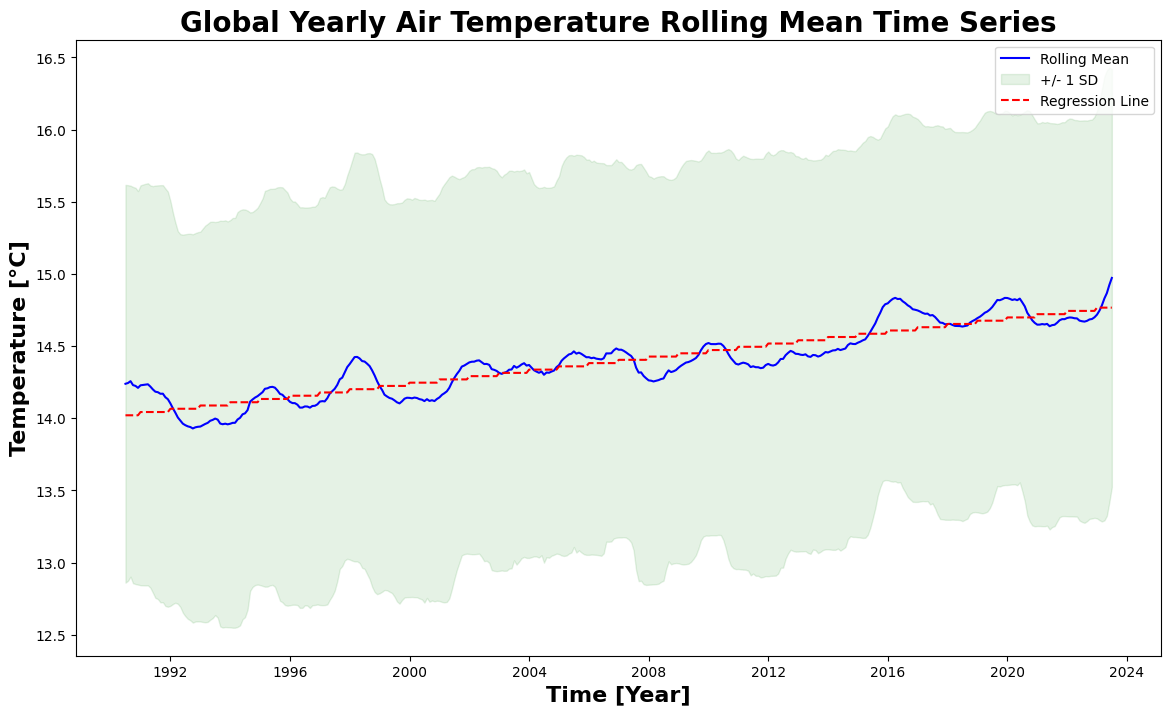

In [4]:
#the dataset
west_t2m  = era5_A

# west_t2mm.sel(longitude=slice(-20, 16), latitude=slice(18, -1))

# Calculate normalized weights
_, lat_field = np.meshgrid(west_t2m.longitude.values, west_t2m.latitude.values)
weight = np.cos(np.pi * lat_field / 180)
data = np.ma.masked_invalid(west_t2m.t2m)
weight[data.mask[0, :, :]] = np.nan
weight_normalized = weight / np.nansum(weight)

# Add weights as second Xarray Data variable and apply weights to the tp
west_t2m['weight_normalized'] = xr.DataArray(
    weight_normalized, coords=[west_t2m.latitude.values, west_t2m.longitude.values], dims=['latitude', 'longitude'])
west_t2m['sm_norma'] = west_t2m.t2m * west_t2m.weight_normalized

# Calculate the global values
west_t2m_m = west_t2m.sm_norma.sum(dim=['latitude', 'longitude'])
# Calculate the 12-month rolling mean
west_t2m_mean_rolling = west_t2m_m.rolling(time=12, center=True).mean().dropna('time')

# Calculate standard deviation
std_rr = west_t2m_m.rolling(time=12, center=True).std().dropna('time')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

ax.plot(west_t2m_mean_rolling.time, west_t2m_mean_rolling, color='blue', label='Rolling Mean')
ax.fill_between(west_t2m_mean_rolling.time, (west_t2m_mean_rolling + std_rr), (west_t2m_mean_rolling - std_rr), alpha=0.1, color='green', label='+/- 1 SD')

# Fit a linear regression model
# Prepare data for regression
time_encoded = np.array(west_t2m_mean_rolling.time.values, dtype='datetime64[Y]').astype(float)  # Convert times to float years
slope, intercept = np.polyfit(time_encoded, west_t2m_mean_rolling, 1)
regression_line = slope * time_encoded + intercept

# Plot regression line
ax.plot(west_t2m_mean_rolling.time, regression_line, color='red', linestyle='--', label='Regression Line')

# Add title, x- and y-labels
plt.title('Global Yearly Air Temperature Rolling Mean Time Series', fontweight='bold', fontsize = '20')
plt.ylabel("Temperature [°C]", fontsize=16, fontweight='bold')
plt.xlabel("Time [Year]", fontsize=16, fontweight='bold')
plt.legend()

plt.show()


## Global Rolling Mean Time Series

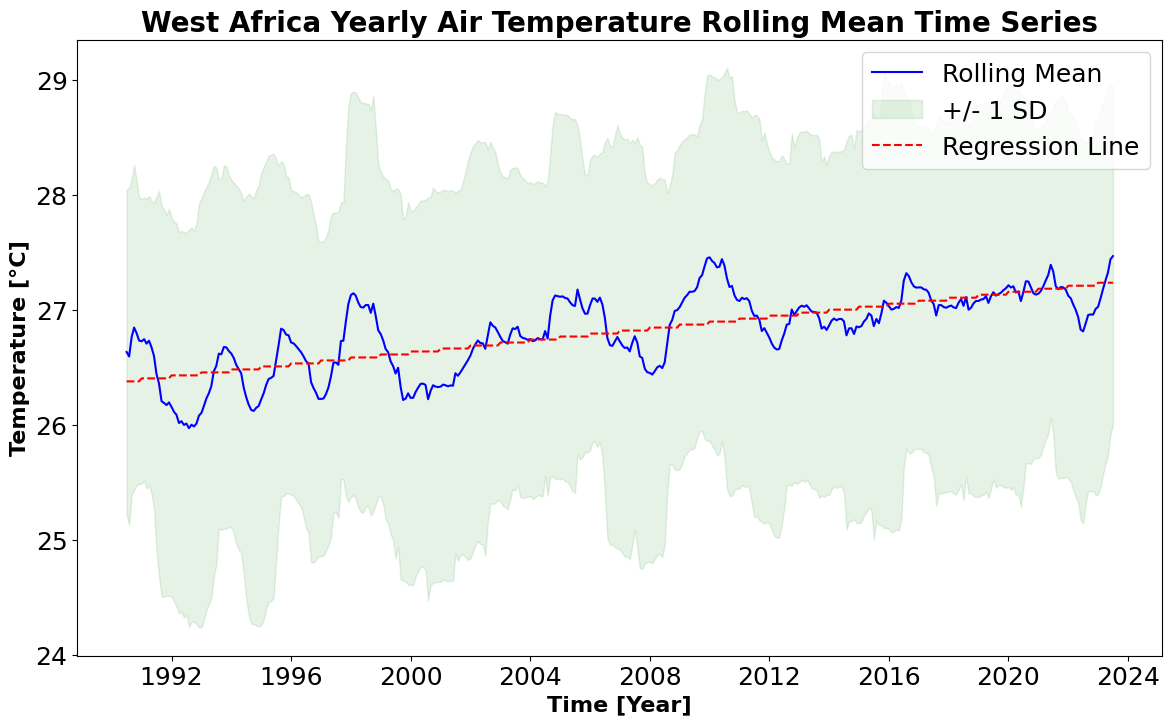

In [13]:
#the dataset
west_t2mm = era5_A.sel(time=slice('1990-01-01', '2023-12-01'))

# Slicing data for West Africa
west_t2m = west_t2mm.sel(longitude=slice(-20, 16), latitude=slice(18, -1))

# Calculate normalized weights
_, lat_field = np.meshgrid(west_t2m.longitude.values, west_t2m.latitude.values)
weight = np.cos(np.pi * lat_field / 180)
data = np.ma.masked_invalid(west_t2m.t2m)
weight[data.mask[0, :, :]] = np.nan
weight_normalized = weight / np.nansum(weight)

# Add weights as second Xarray Data variable and apply weights to the tp
west_t2m['weight_normalized'] = xr.DataArray(
    weight_normalized, coords=[west_t2m.latitude.values, west_t2m.longitude.values], dims=['latitude', 'longitude'])
west_t2m['sm_norma'] = west_t2m.t2m * west_t2m.weight_normalized

# Calculate the global values
west_t2m_m = west_t2m.sm_norma.sum(dim=['latitude', 'longitude'])
# Calculate the 12-month rolling mean
west_t2m_mean_rolling = west_t2m_m.rolling(time=12, center=True).mean().dropna('time')

# Calculate standard deviation
std_rr = west_t2m_m.rolling(time=12, center=True).std().dropna('time')

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

ax.plot(west_t2m_mean_rolling.time, west_t2m_mean_rolling, color='blue', label='Rolling Mean')
ax.fill_between(west_t2m_mean_rolling.time, (west_t2m_mean_rolling + std_rr), (west_t2m_mean_rolling - std_rr), alpha=0.1, color='green', label='+/- 1 SD')

# Fit a linear regression model
# Prepare data for regression
time_encoded = np.array(west_t2m_mean_rolling.time.values, dtype='datetime64[Y]').astype(float)  # Convert times to float years
slope, intercept = np.polyfit(time_encoded, west_t2m_mean_rolling, 1)
regression_line = slope * time_encoded + intercept

# Plot regression line
ax.plot(west_t2m_mean_rolling.time, regression_line, color='red', linestyle='--', label='Regression Line')

# Add title, x- and y-labels
plt.title('West Africa Yearly Air Temperature Rolling Mean Time Series', fontweight='bold', fontsize = '20')
plt.ylabel("Temperature [°C]", fontsize=16, fontweight='bold')
plt.xlabel("Time [Year]", fontsize=16, fontweight='bold')
plt.legend()

plt.show()
